## Communicate Data Findings

This project is divided into two major parts.

- In the first part, you will conduct an **exploratory data analysis** on a dataset of your choosing. 
- In the second part, you will take your main findings from your exploration and convey them to others through an **explanatory analysis**.


I will perform an exploratory analysis on data provided by **Ford GoBike**,
a bike-share system provider.

     Dataset :https://www.fordgobike.com/system-data
              https://s3.amazonaws.com/baywheels-data/index.html 
              i.e.  201904-fordgobike-tripdata.csv.zip
              
              Dataset Contain: 239111 Rows & 14 Columns 
                i.e     duration_sec               
                        start_time                
                        end_time                   
                        start_station_id           
                        start_station_name         
                        start_station_latitude     
                        start_station_longitude    
                        end_station_id             
                        end_station_name           
                        end_station_latitude       
                        end_station_longitude      
                        bike_id                    
                        user_type                 
                        bike_share_for_all_trip

## Exploratory data Analysis

**Table of Contents:**

    1) Introduction
    2) Data Wrangling for Exploration
    3) Univariate Exploration
    4) Bivariate Explorationn
    5) Multivariate Exploration
    6) Summary

In [1]:
#import important packagesabs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Wrangling for Exploration

In [2]:
#import 201904-fordgobike-tripdataset

ford_df= pd.read_csv('201904-fordgobike-tripdata.csv')


#### Analyze

In [3]:
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [4]:
#summary
ford_df.info()
ford_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 25.5+ MB


(239111, 14)

In [5]:
ford_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000


In [6]:
#check duplicte values
ford_df.duplicated().sum()

0

In [7]:
#check null values
ford_df.isnull().sum()

duration_sec                0
start_time                  0
end_time                    0
start_station_id           64
start_station_name         64
start_station_latitude      0
start_station_longitude     0
end_station_id             64
end_station_name           64
end_station_latitude        0
end_station_longitude       0
bike_id                     0
user_type                   0
bike_share_for_all_trip     0
dtype: int64

In [8]:

ford_df['user_type'].value_counts()

Subscriber    203197
Customer       35914
Name: user_type, dtype: int64

#### cleaning

In [9]:
ford_clean=ford_df.copy()
ford_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [10]:
# convert dates to timestamps
ford_clean.start_time = pd.to_datetime(ford_clean['start_time'])
ford_clean.end_time = pd.to_datetime(ford_clean['end_time'])

In [11]:
#change start_station_id, end_station_id, bike_id to string
ford_clean.bike_id = (ford_clean['bike_id']).astype(str)
ford_clean.start_station_id = (ford_clean['start_station_id']).astype(str)
ford_clean.end_station_id = (ford_clean['end_station_id']).astype(str)

In [12]:
ford_clean.user_type= (ford_clean['user_type']) .astype('category')

In [13]:
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null datetime64[ns]
end_time                   239111 non-null datetime64[ns]
start_station_id           239111 non-null object
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239111 non-null object
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null object
user_type                  239111 non-null category
bike_share_for_all_trip    239111 non-null object
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 23.9+ MB


In [14]:
#extract weekday name from start_time
ford_clean['start_time_day']=ford_clean['start_time'].dt.strftime('%a')

In [15]:
#extract weekday name from start_time
ford_clean['start_time_hour']=ford_clean['start_time'].dt.hour

In [137]:
ford_clean['duration_min']=ford_clean['duration_sec']/60

In [138]:
ford_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_time_day,start_time_hour,duration_min
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No,Tue,22,838.416667
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No,Tue,20,895.416667


In [18]:
ford_clean['start_time_day'].value_counts()

Tue    43607
Mon    40913
Wed    38852
Thu    38850
Fri    35462
Sat    23070
Sun    18357
Name: start_time_day, dtype: int64

### Exploration (Visualization)

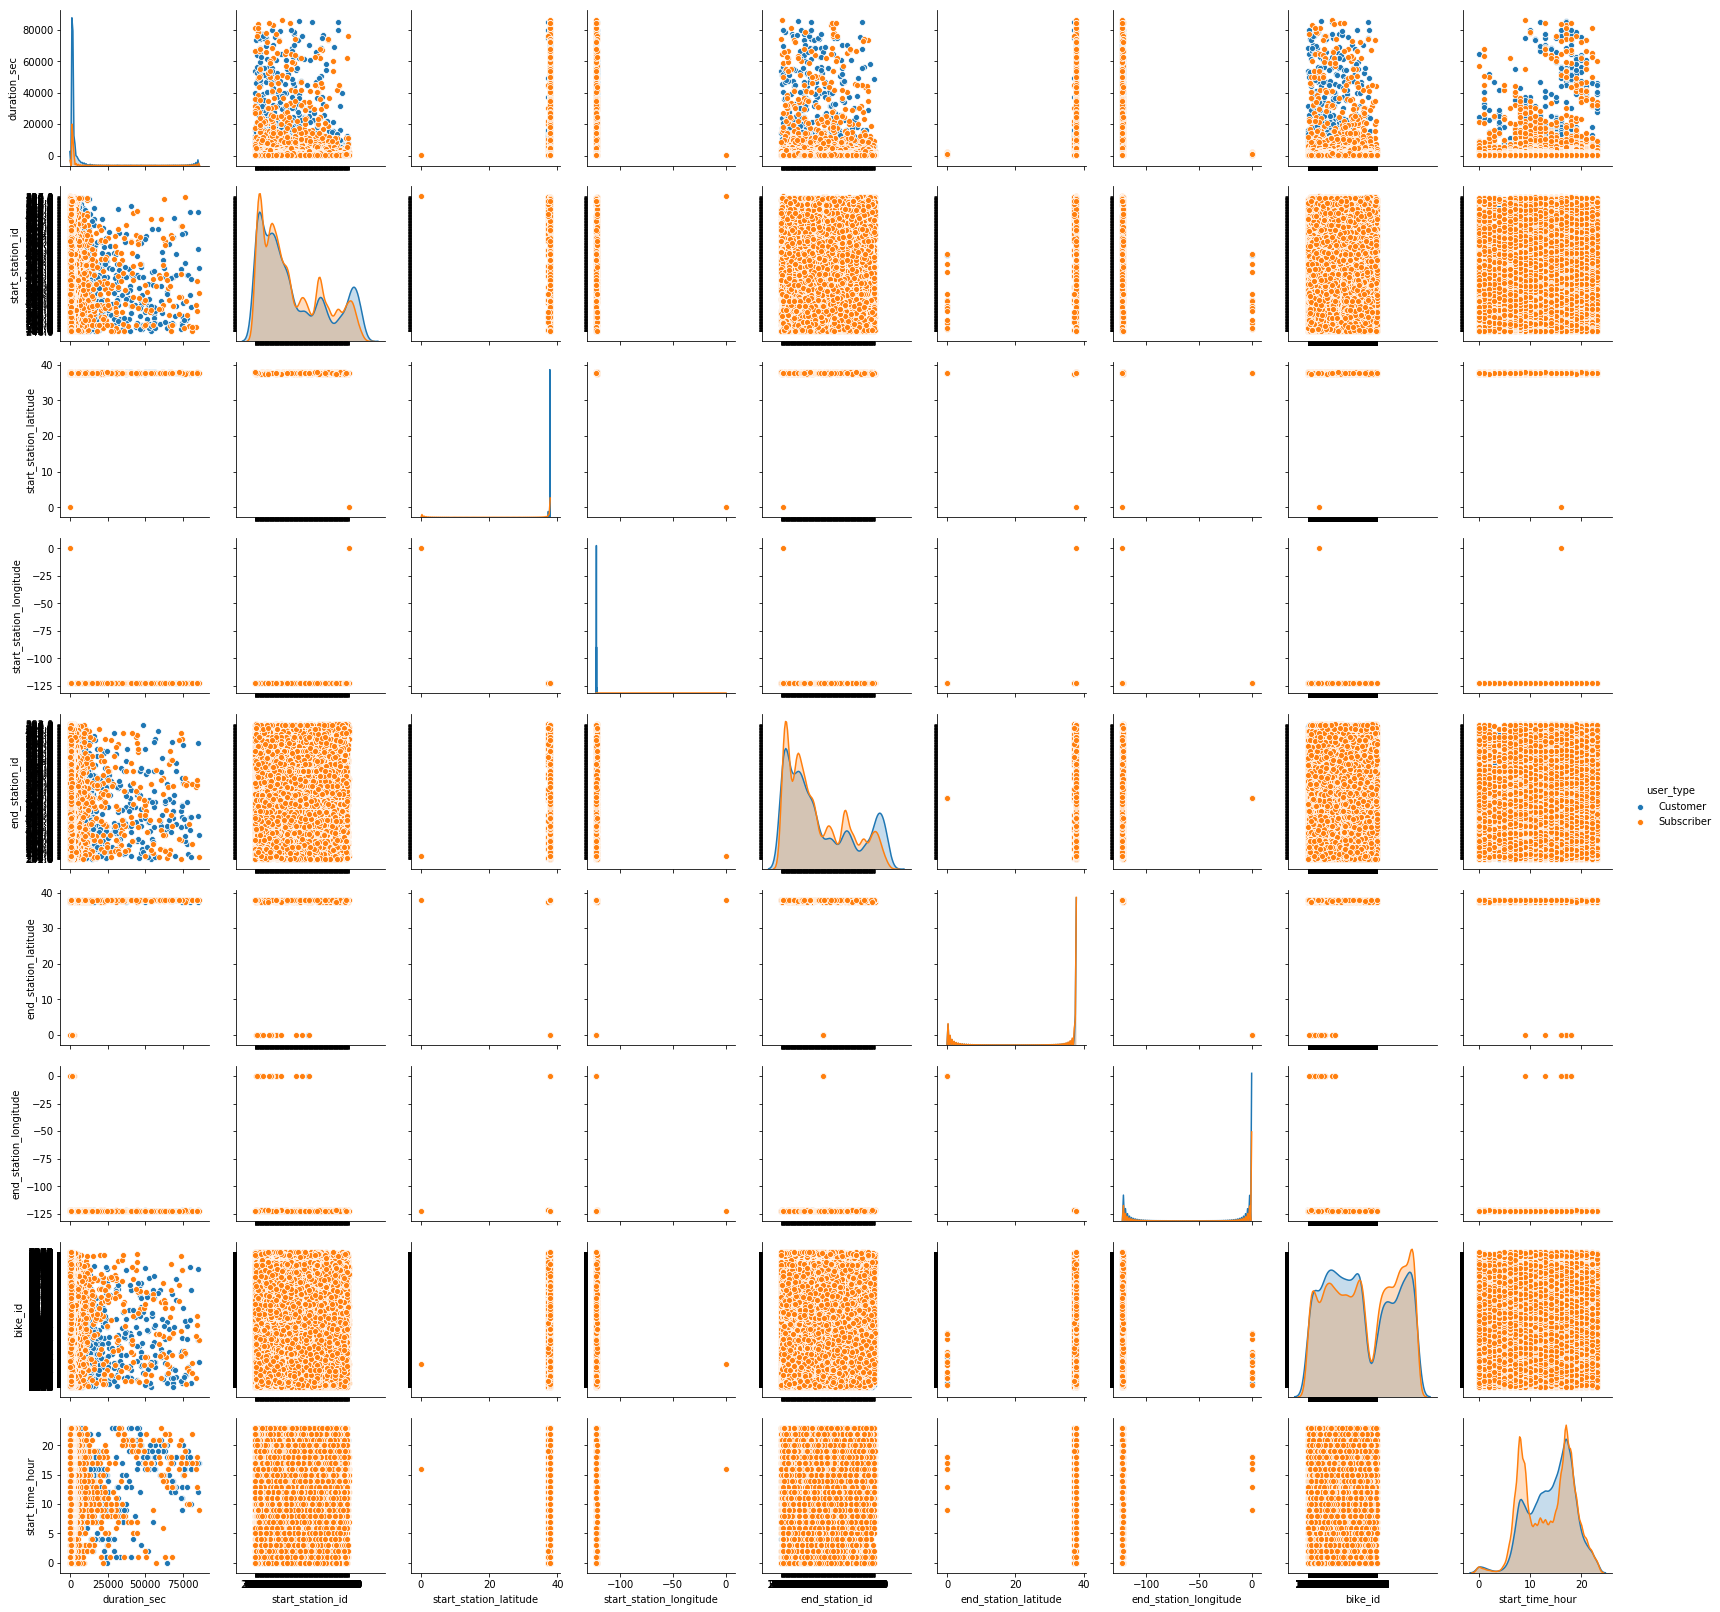

In [82]:
sns.pairplot(ford_clean, hue='user_type', height=2.5)

### Univariate Exploration
    1) Bikes rides on weekdays
    2) Hourly rides of the bike
    3) Trip duration (sec) histogram
    4) Distribution of User Type

In [19]:
base_color= sns.color_palette()[0]

Text(-8.700000000000003, 0.5, 'No. of Bike Trips')

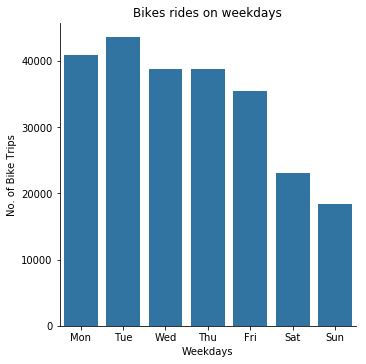

In [20]:
#1) Bikes rides on weekdays
weekday=['Mon',"Tue","Wed","Thu","Fri","Sat","Sun"]
sns.catplot(data=ford_clean, x='start_time_day', kind='count', order=weekday, color=base_color)
plt.title("Bikes rides on weekdays")

plt.xlabel("Weekdays")
plt.ylabel("No. of Bike Trips")

Text(-8.825000000000003, 0.5, 'No. of Bike Trips')

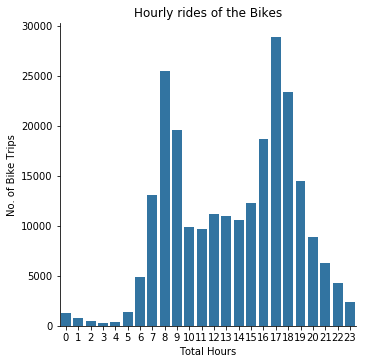

In [22]:
# 2) Hourly rides of the bike
sns.catplot(data=ford_clean, x='start_time_hour', kind='count',  color=base_color)
plt.title("Hourly rides of the Bikes")

plt.xlabel("Total Hours")
plt.ylabel("No. of Bike Trips")

Text(0.5, 0, 'Duration in Sec')

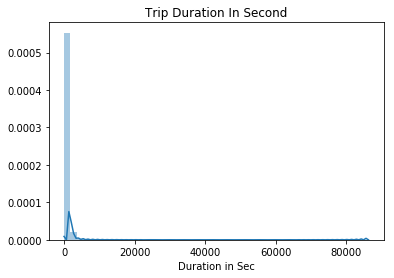

In [23]:
#3) Trip duration (sec)
sns.distplot(ford_clean['duration_sec'])
plt.title("Trip Duration In Second")

plt.xlabel("Duration in Sec")

<Figure size 360x360 with 0 Axes>

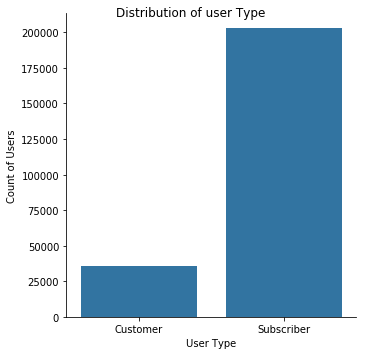

In [181]:
# 4) Distribution of user type
plt.figure(figsize=(5,5))
a=sns.catplot(data=ford_clean, x='user_type', kind='count',  color=base_color)
a.fig.suptitle("Distribution of user Type")

a.set_axis_labels("User Type", "Count of Users")

### Bivariate Exploration
    1) Weekly usage Trends by user type
    2) Hourly usage of the bike share system user type
    3) Bike Rides percentage by user type(Pie chart) : Source:https://pythonspot.com/matplotlib-pie-chart/
    4) Trip Duration and Start Station
    5) Trip Duration and End Station



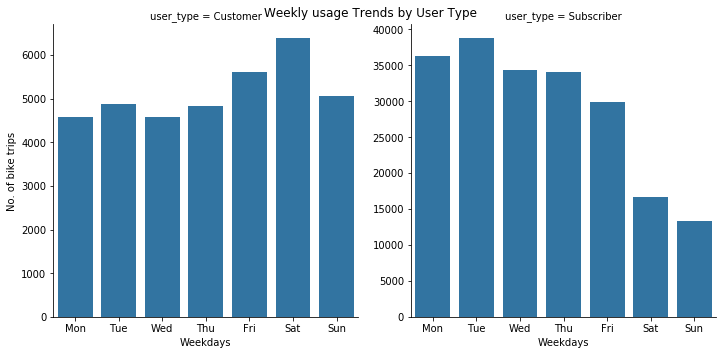

In [63]:
#1) #weekly usage Trends by user type
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
a=sns.catplot(data=ford_clean, x='start_time_day', hue='user_type',order=weekday, kind='count', sharey= False,color=base_color)
a.fig.suptitle('Weekly usage Trends by User Type', )

a.set_axis_labels('Weekdays',"No. of bike trips")

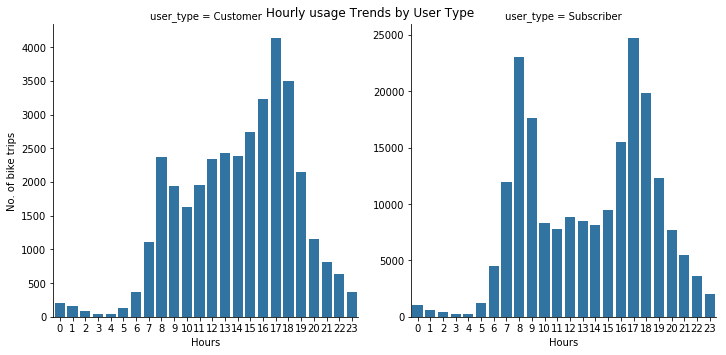

In [64]:
#2) #weekly usage Trends by user type
a=sns.catplot(data=ford_clean, x='start_time_hour', col='user_type', kind='count', sharey= False,color=base_color)
a.fig.suptitle('Hourly usage Trends by User Type' )

a.set_axis_labels('Hours',"No. of bike trips")

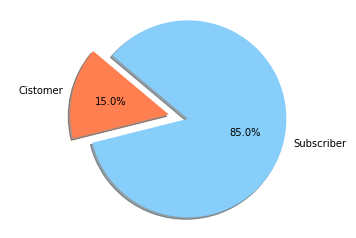

In [91]:
# 3) Bike Rides % by user type
customer = ford_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = ford_clean.query('user_type == "Subscriber"')['bike_id'].count()

customerP= (customer/ford_clean['bike_id'].count())*100
subscriberP= (subscriber/ford_clean['bike_id'].count())*100

customer, subscriber,customerP,subscriberP

# Data to plot
labels = ['Cistomer', 'Subscriber']
sizes = [customerP,subscriberP]
colors = [ 'coral', 'lightskyblue']
explode = ( 0.2, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

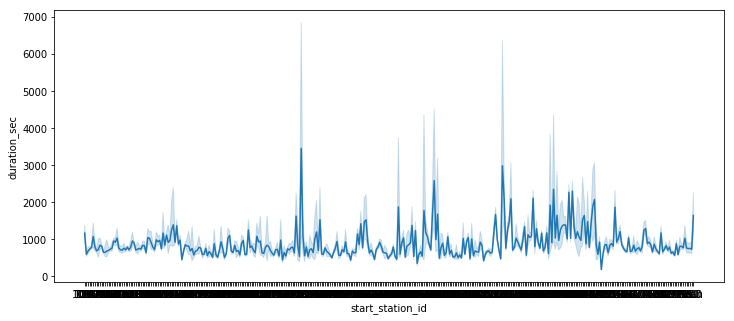

In [115]:
#Trip Duration and Start Station
plt.figure(figsize=(12,5))
sns.lineplot(y="duration_sec", x="start_station_id",data=ford_clean)


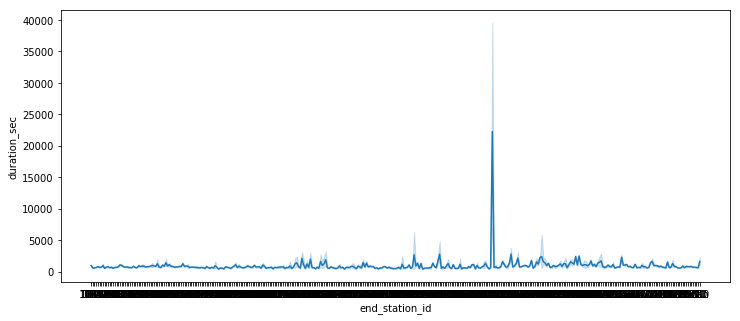

In [118]:
#Trip Duration and End Station
plt.figure(figsize=(12,5))
sns.lineplot(y="duration_sec", x="end_station_id",data=ford_clean)


#### Multivariate Exploration
    1) Create faceted scatterplot of the day and time by user type
        Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
    
    2) Duration of bikers acreoss day of week nd hour
        #Source : https://seaborn.pydata.org/generated/seaborn.pointplot.html
    
    3) Showing usage during the weekday for customers and subscribers(Heatmap) 
        # source: https://seaborn.pydata.org/generated/seaborn.heatmap.html

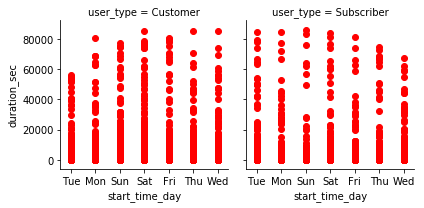

In [132]:
# Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# create faceted scatterplot of the day and time by user type
g = sns.FacetGrid(ford_clean, col="user_type", height=3)
g = g.map(plt.scatter,'start_time_day', "duration_sec",color='r')

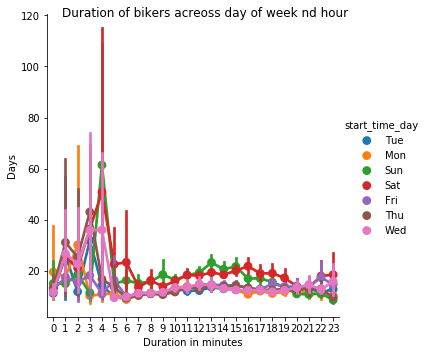

In [160]:
#Source : https://seaborn.pydata.org/generated/seaborn.pointplot.html
#Duration of bikers acreoss day of week nd hour
plt.figure(figsize=(15,7))
a= sns.catplot(x="start_time_hour", y="duration_min",hue='start_time_day',kind="point",data=ford_clean)

a.fig.suptitle('Duration of bikers acreoss day of week nd hour' )

a.set_axis_labels('Duration in minutes',"Days")

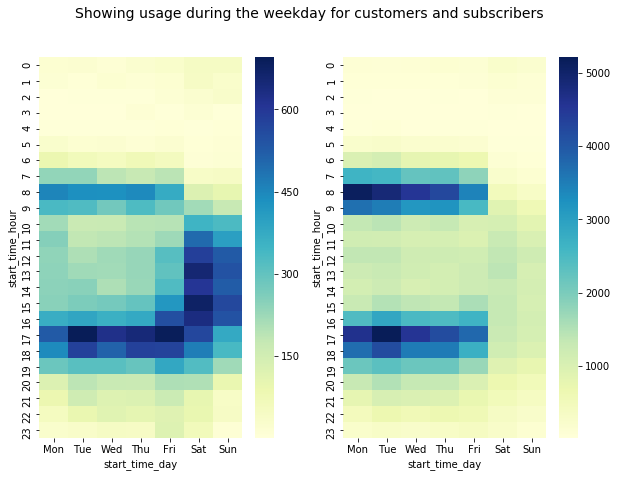

In [178]:
#(Heatmap) Showing usage during the weekday for customers and subscribers
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(10,7))
plt.suptitle('Showing usage during the weekday for customers and subscribers', fontsize=14)

# Setting the weekday order
ford_clean['start_time_day'] = pd.Categorical(ford_clean['start_time_day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'])


# heatmap for customers
plt.subplot(1, 2, 1)
customer_df = ford_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
customer_df = customer_df.pivot("start_time_hour", "start_time_day", "bike_id")
sns.heatmap(customer_df, cmap="YlGnBu")


# heatmap for subscribers
plt.subplot(1, 2, 2)
subscriber_df = ford_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
subscriber_df = subscriber_df.pivot("start_time_hour", "start_time_day", "bike_id")
sns.heatmap(subscriber_df, cmap="YlGnBu")



**The plot perfectly summarizes the diffrent trends for customers and subscribers**


### Summary
 
    -TheFord GoBike System is a fantastic (healthy and environmentally friendly)
    -Customers use the bike sharing system more often on weekends
    -Subscribers use the bike sharing system mainly on weekdays